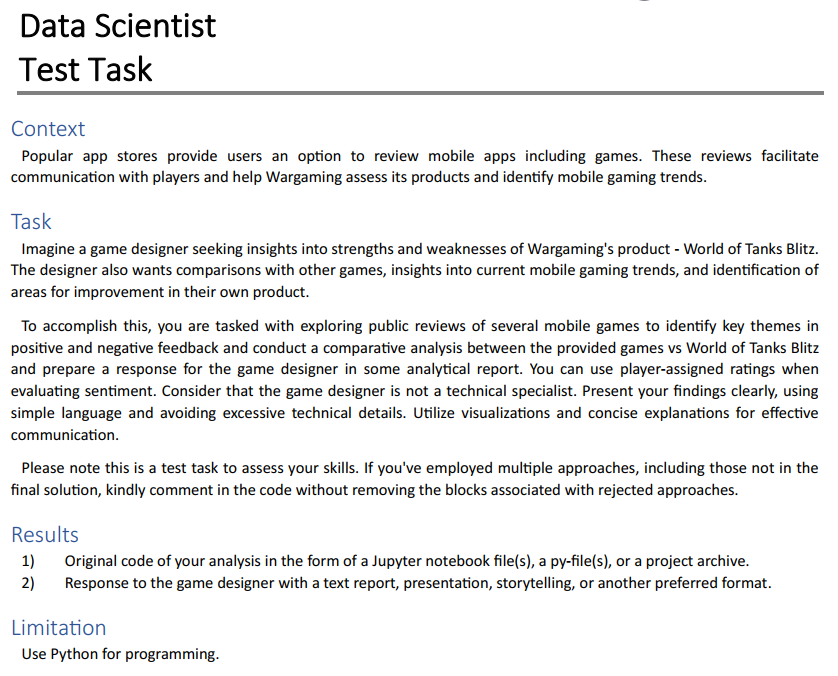

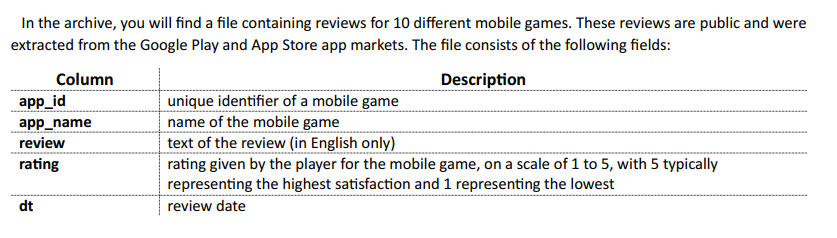

# Sentiment analysis in Python
## Maciej Milanowski

Conducted using 'Bag of words' approach using VADER (Valence Aware Dictionary and sEntiment Reasoner)

#### Steps:

1. Step 1. Dataset exploration: rating analysis 
2. Step 2. Rating distribution in time
3. Step 3. VADER sentiment analysis
4. Step 4. VADER sentiment rating vs. User rating

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# pip install nltk
import nltk

# Imports necessary for enabling the use the word_tokenize, pos_tag and other nltk functions.
import nltk.data
nltk.download('punkt') # Enables word_tokenize. Found with help of https://www.youtube.com/watch?v=GPeWi_2JL_c
nltk.download('averaged_perceptron_tagger') # Enables pos_tag.
nltk.download('maxent_ne_chunker') #Enables chunk.ne_chunk
nltk.download('words') #Enables chunk.ne_chunk

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') # Enables SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\macko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\macko\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\macko\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\macko\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\macko\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv('Mid_DS_NLP/Mid_DS_NLP.csv')
df.head()

,app_id,app_name,review,rating,dt
0,1000600000601387,Wordscapes,Really gets your brain to work!,5,2021-10-29
1,1000600000622822,Free Fire,Worst game ever pubg is better than this 💩💩,1,2021-12-16
2,1000600000652669,PUBG MOBILE,The game going day by day to free fire making ...,5,2021-09-19
3,1000600000652669,PUBG MOBILE,Good game but tdm glicth and erangle glicth pl...,5,2022-09-16
4,1000600000734653,Call of Duty: Mobile,this Game Is Great,5,2022-01-09


In [3]:
print(df['dt'].min(), df['dt'].max())

2021-07-01 2022-12-31


## Step 1. Dataset exploration: rating analysis 

In [4]:
# Number of reviews for each of the games in the dataset
df_counts = df['app_name'].value_counts()
print(df_counts)

Free Fire                    501780
PUBG MOBILE                  444840
Call of Duty: Mobile         411600
Fishdom: Deep Dive            76524
Solitaire - Grand Harvest     73825
Wordscapes                    66606
War Robots                    57826
Gardenscapes - New Acres      55453
World of Tanks Blitz          45496
Disney Emoji Blitz            35782
Name: app_name, dtype: int64


#### If it is a stratified sample, which I believe it is, we can infer the popularity of each game from the code above.
- Number of reviews for Free Fire, PUBG MOBILE and Call of Duty: Mobile is the highest.
- That tells us these are the top 3 popular games in the sample.
- World of tank Blitz does not attract as many users; the number of reviews is roughly 10x smaller.  

### First, let's explore the __average rating__ for each game

In [5]:
combined_ratings = df.groupby('app_name')['rating'].mean().reset_index()
combined_ratings = combined_ratings.sort_values(by='rating', ascending=False)

combined_ratings

,app_name,rating
6,Solitaire - Grand Harvest,4.409238
1,Disney Emoji Blitz,4.253871
8,Wordscapes,4.087785
4,Gardenscapes - New Acres,3.891404
3,Free Fire,3.696273
5,PUBG MOBILE,3.631121
7,War Robots,3.504686
0,Call of Duty: Mobile,3.498941
9,World of Tanks Blitz,3.490549
2,Fishdom: Deep Dive,3.465527


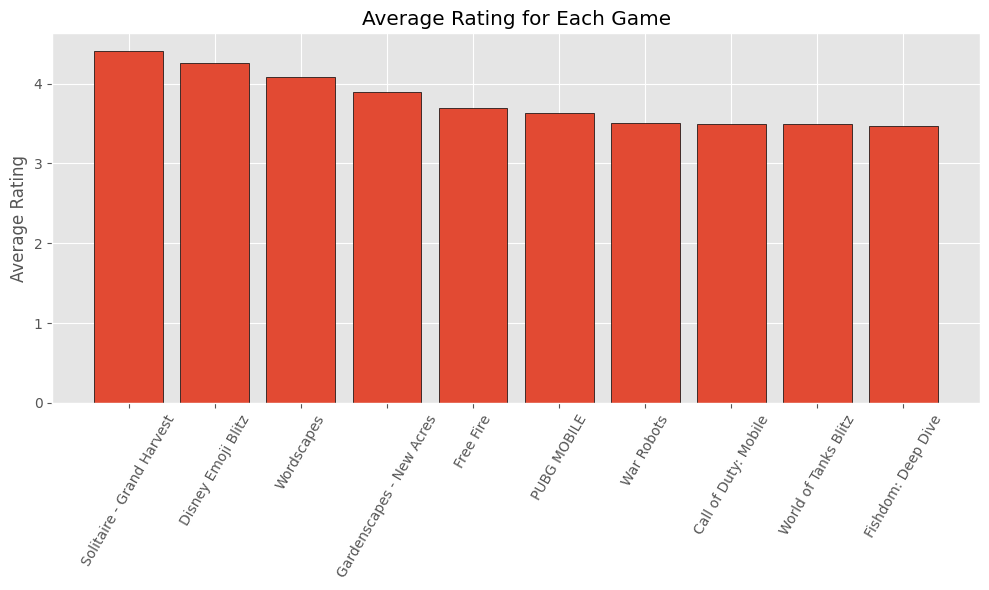

In [6]:
# For the report

plt.figure(figsize=(10, 6))
plt.bar(combined_ratings['app_name'], combined_ratings['rating'], edgecolor='black')
plt.ylabel('Average Rating')
plt.title('Average Rating for Each Game')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

### Second, let's explore the combined rating for all the games in the dataset

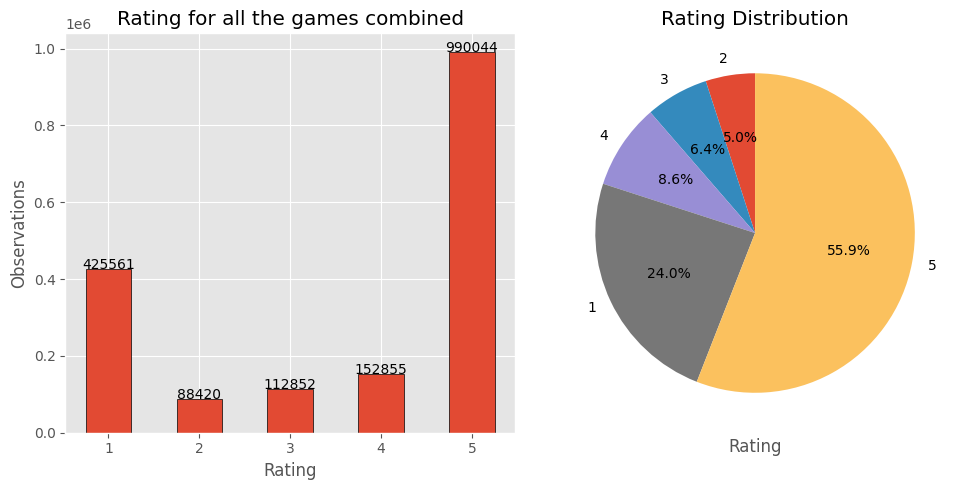

In [7]:
freq = df['rating'].value_counts().sort_values()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot on the left
axes[0].bar(freq.index, freq.values, width=0.5, edgecolor='black')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Observations')
axes[0].set_title('Rating for all the games combined')

# Adding annotations to the bar plot
for x, y in zip(freq.index, freq.values):
    axes[0].annotate(str(int(y)), xy=(x, y+10), ha='center', fontsize=10)

# Pie chart on the right
axes[1].pie(freq.values, labels=freq.index, autopct='%1.1f%%', startangle=90)
axes[1].set_xlabel('Rating')
axes[1].set_title('Rating Distribution')

# Adjust layout and display
plt.tight_layout()
plt.show()

### And now, let's explore the rating separately for each game in the dataset

#### Rating

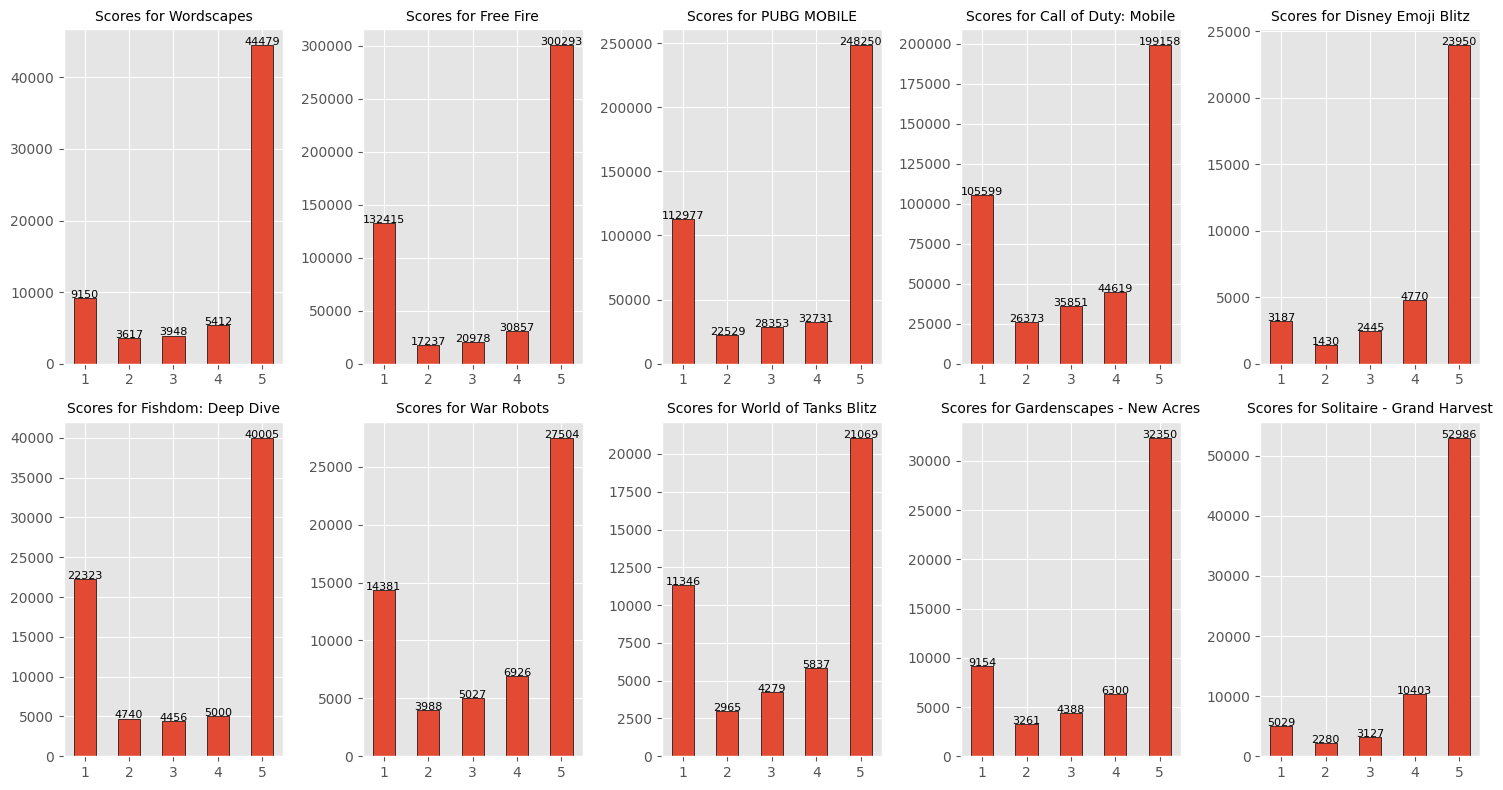

In [8]:
games = df['app_name'].unique() # Taking 10 games for example

num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i, game in enumerate(games):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col]

    freq = df[df['app_name'] == game]['rating'].value_counts().sort_values()

    ax.bar(freq.index, freq.values, width=0.5, edgecolor='black')

    ax.set_title(f'Scores for {game}', fontsize=10)

    # Adding annotations to the plot
    for x, y in zip(freq.index, freq.values):
        ax.annotate(str(int(y)), xy=(x, y + 5), ha='center', fontsize=8)

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Rating distribution

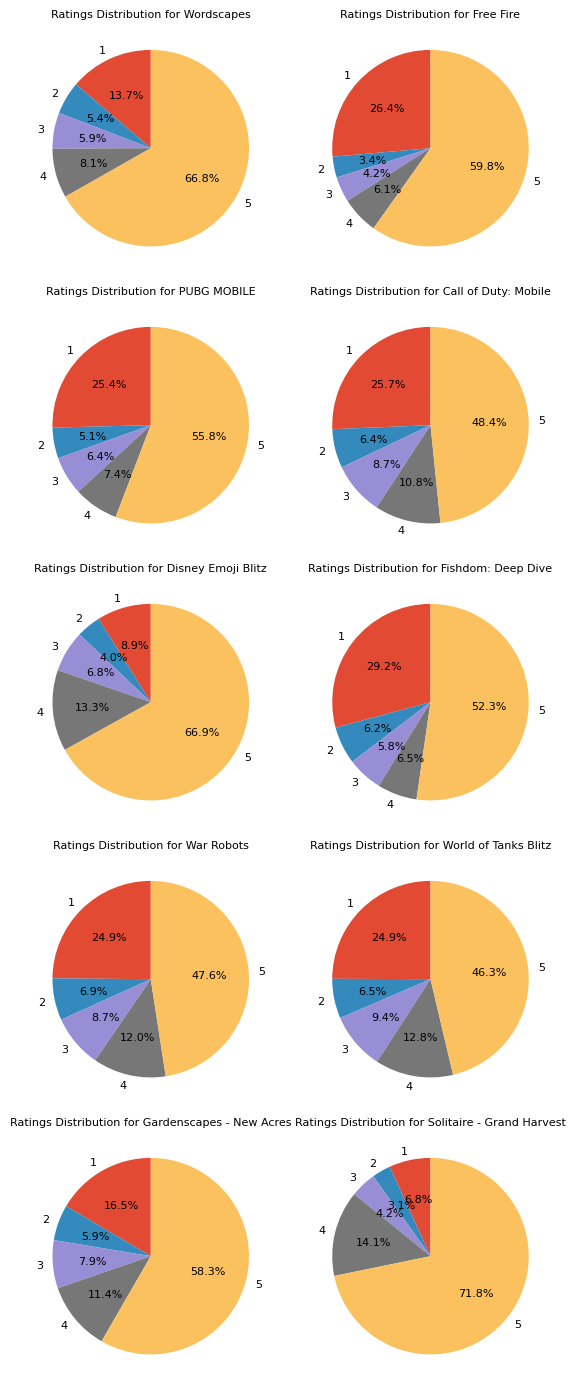

In [9]:
num_rows = 5
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 14))  # Adjust figsize as needed

for i, game in enumerate(games):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col]

    ratings = df[df['app_name'] == game]['rating']
    rating_counts = ratings.value_counts().sort_index()

    ax.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
    ax.set_title(f'Ratings Distribution for {game}', fontsize=8)

# Adjust layout and display
plt.tight_layout()
plt.show()

### __Notes:__
- World of Tanks Blitz, our object of interest, has the lowest percentage of 5-star reviews - 46.3% - however, at the same time it has a relatively high percentage of 4-star reviews - 12.8% - which allows for an average combied rating of 3.49.
- In general, the distribution of the positive and negative reviews among the games is __fairly__ balanced with a few exceptions, for example:
    - People in the sample seem to love Solitaire - Grand Harvest, it has the most positive rating, and the least negative.
- If we were to put the games in bins based on the rating distribution, we'd have really 3 bins:
    - __Cat 1: Outstanding rating (2 games):__ 
        - Solitaire, 
        - Disney Emoji Blitz
    - __Cat 2: High rating (2 games):__ 
        - Wordscapes, 
        - Gardenscapes - New Acres
    - __Cat 3: Medium rating (6 games):__ 
        - All the rest, World of Tanks Blitz included

## Step 2. Rating distribution in time

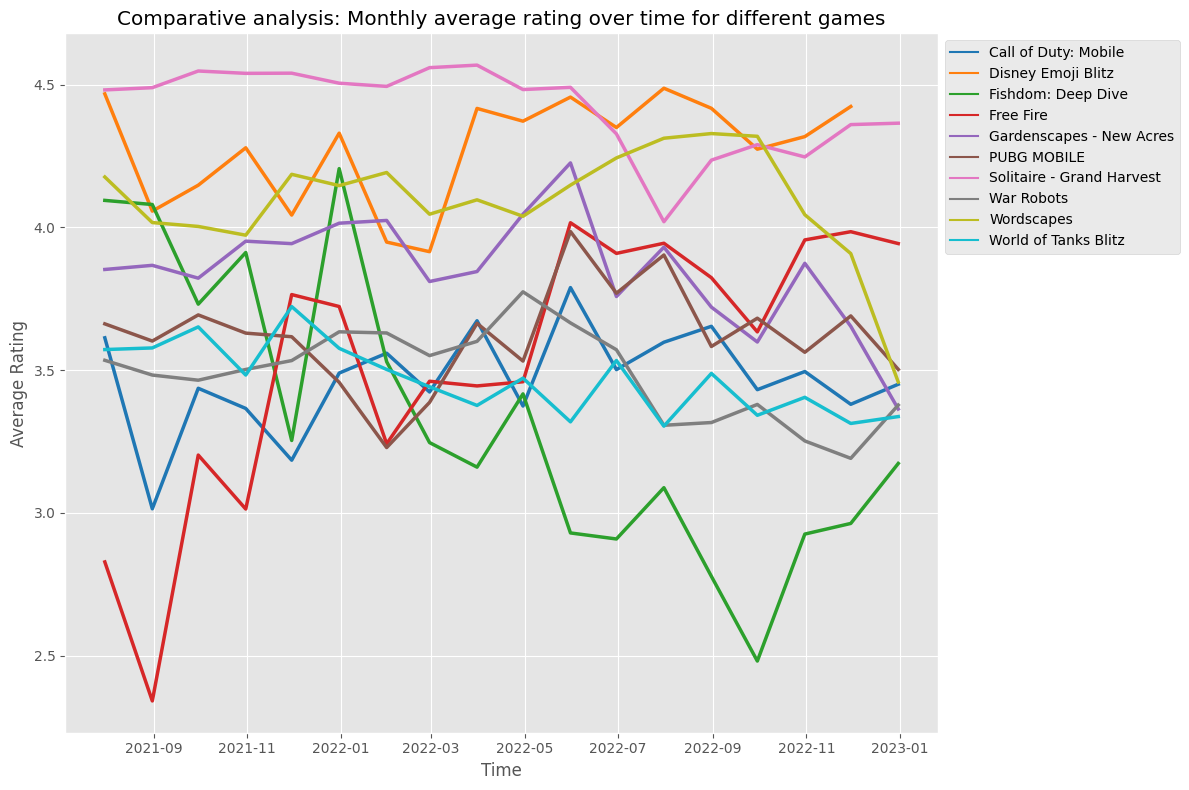

In [10]:
# Ensure 'dt' column is in datetime format
df['dt'] = pd.to_datetime(df['dt'])

# Set 'dt' column as the DataFrame index for easier manipulation
df.set_index('dt', inplace=True)

# Group by 'app_name' and resample ratings monthly for each game
grouped = df.groupby('app_name')['rating'].resample('M').mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Use Seaborn's lineplot to plot monthly ratings over time for each game
sns.lineplot(x='dt', y='rating', data=grouped, hue='app_name', palette='tab10', linewidth=2.5)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.title('Comparative analysis: Monthly average rating over time for different games')

# Show legend with appropriate location
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()

### __Notes:__
- World of Tanks Blitz is represented as the light blue line on the chart.
- Looking at the monthly average rating for our game, it looks like the rating has a slightly declining trend over the observation period
- __The increase in Free Fire's rating in time is remarkable, it went from a rating below 2.5 in September 2021 to a rating of about 4 in January 2023. Can we analyze their strategy and implement that in our product?__

#### Let's just plot the monthly average rating for World of Tanks Blitz with a regression line

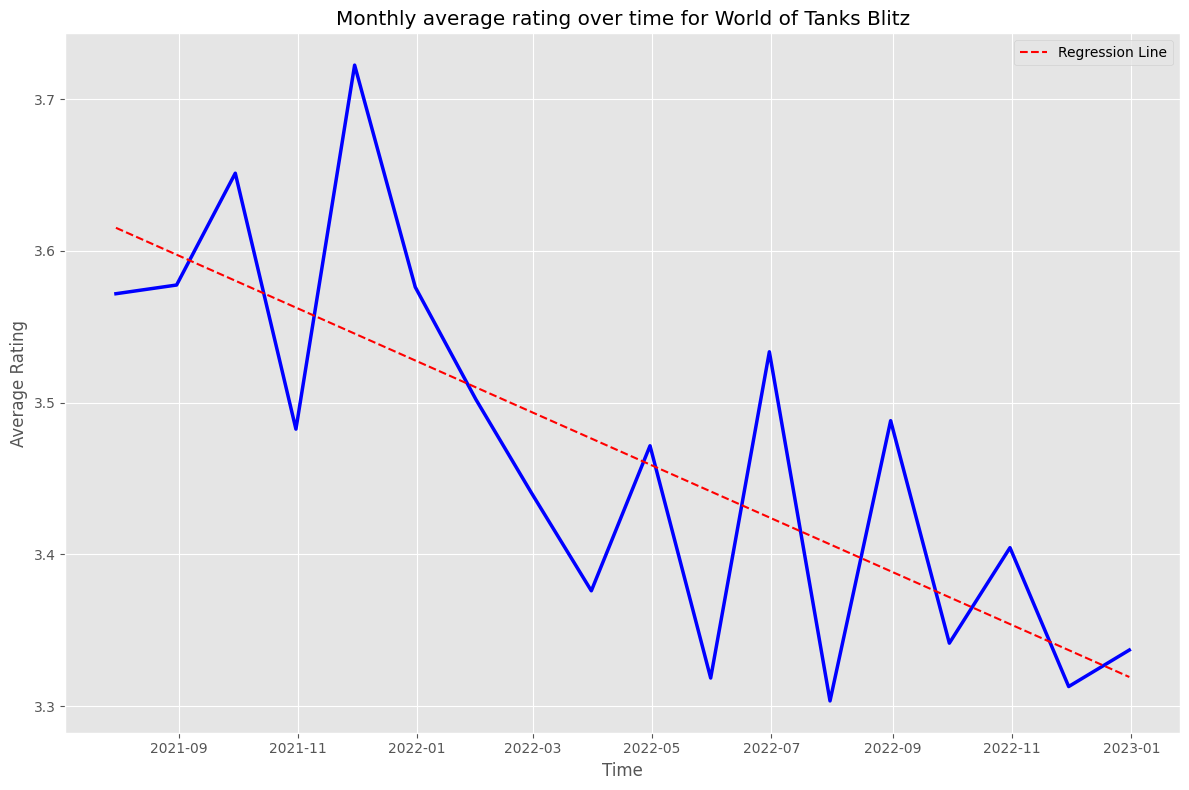

In [11]:
# Filter the DataFrame for 'World of Tanks Blitz'
wot_blitz = df[df['app_name'] == 'World of Tanks Blitz']

# Group by 'app_name' and resample ratings monthly for 'World of Tanks Blitz'
grouped = wot_blitz.groupby('app_name')['rating'].resample('M').mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Use Seaborn's lineplot to plot monthly ratings over time for 'World of Tanks Blitz'
sns.lineplot(x='dt', y='rating', data=grouped, color='blue', linewidth=2.5)

# Calculate the regression line separately
x_values = pd.to_numeric(grouped['dt']).values.reshape(-1, 1)  # Convert datetime to numeric for regression
y_values = grouped['rating'].values

# Fit the regression line
regression = np.polyfit(x_values.flatten(), y_values, 1)
plt.plot(grouped['dt'], np.polyval(regression, x_values), color='red', linestyle='--', label='Regression Line')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.title('Monthly average rating over time for World of Tanks Blitz')

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

### __Notes:__
- Looking at the monthly average graph above, it looks like a bad month (decease in rating M/M) is usally followed by a good month (increase in rating M/M).
- However, __the Game Designers should be concerned about the period between 2021-12 and 2022-04__ when the average monthly rating had a declining trend for consecutive 4 months. 
- The spikes and valleys look steeper than on the previous graph because  of the zoom-in on the y-axis. Let's confirm that in the graph below. 

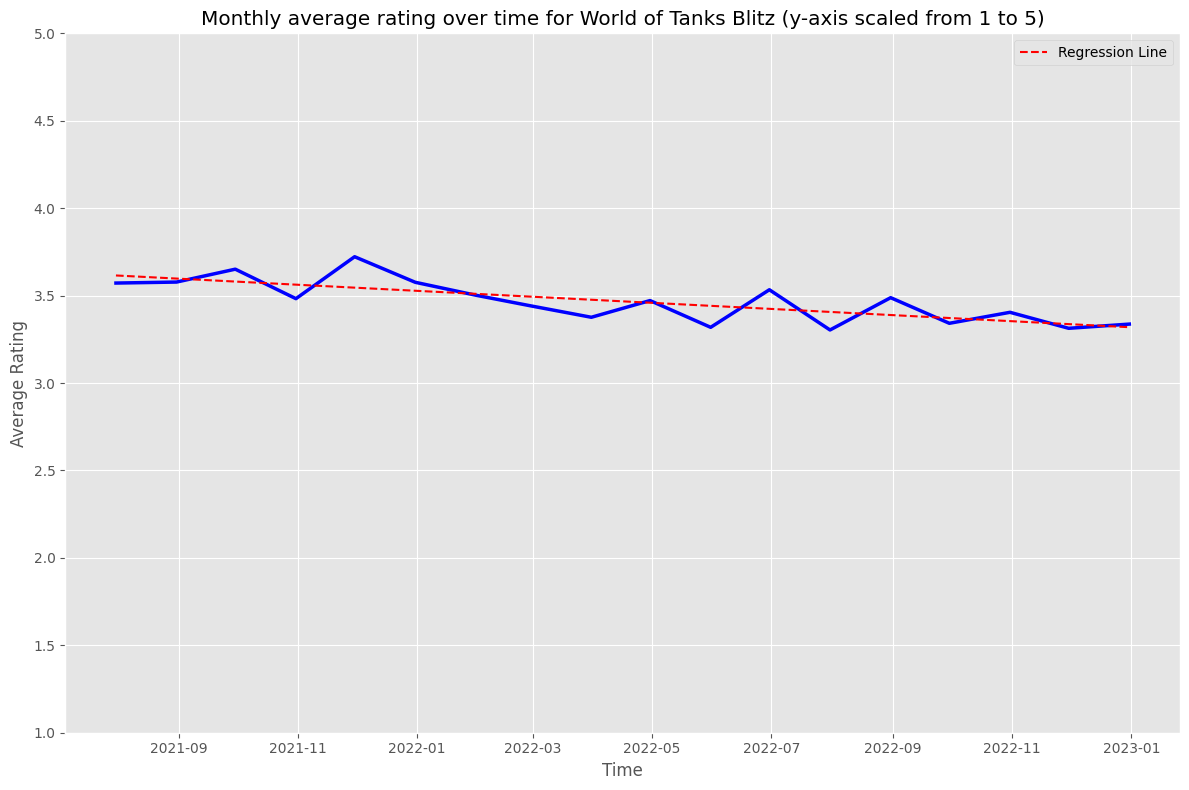

In [12]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# lineplot to plot monthly ratings over time for 'World of Tanks Blitz'
sns.lineplot(x='dt', y='rating', data=grouped, color='blue', linewidth=2.5)

# Calculate the regression line separately
x_values = pd.to_numeric(grouped['dt']).values.reshape(-1, 1)  # Convert datetime to numeric for regression
y_values = grouped['rating'].values

# Fit the regression line
regression = np.polyfit(x_values.flatten(), y_values, 1)
plt.plot(grouped['dt'], np.polyval(regression, x_values), color='red', linestyle='--', label='Regression Line')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.title('Monthly average rating over time for World of Tanks Blitz (y-axis scaled from 1 to 5)')

# Set y-axis limits to show from 0 to 5
plt.ylim(1, 5)

# Show legend & plot
plt.legend()
plt.tight_layout()
plt.show()

Let's increase granularity

In [13]:
# # Group by 'app_name' and resample ratings weekly for 'World of Tanks Blitz'
# grouped = wot_blitz.groupby('app_name')['rating'].resample('W').mean().reset_index()

# # Set the size of the plot
# plt.figure(figsize=(12, 8))

# # Use Seaborn's lineplot to plot weekly ratings over time for 'World of Tanks Blitz'
# sns.lineplot(x='dt', y='rating', data=grouped, color='blue', linewidth=2.5)

# # Set labels and title
# plt.xlabel('Time')
# plt.ylabel('Average Rating')
# plt.title('Weekly average rating over time for World of Tanks Blitz')

# # Show plot
# plt.tight_layout()
# plt.show()

Weekly average rating does not provide much insight, let's look at the daily plot.

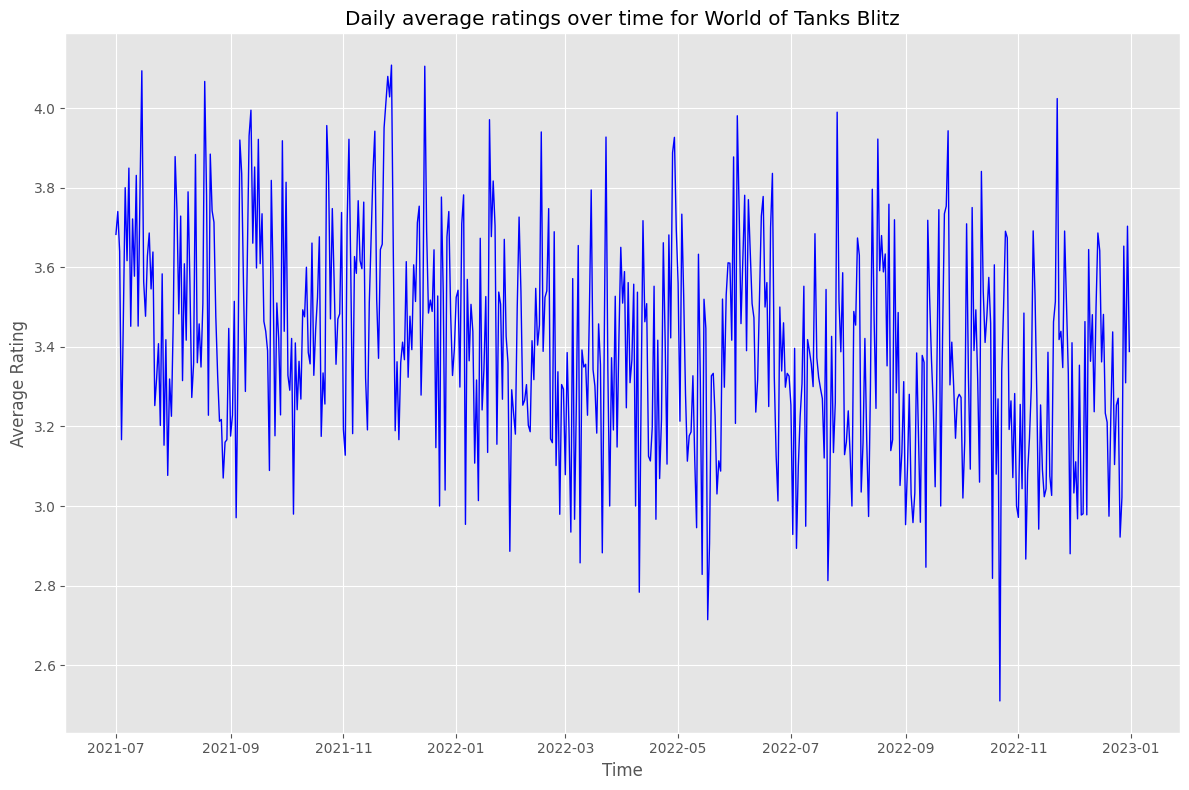

In [14]:
# Group by 'app_name' and 'dt', calculate daily average ratings for 'World of Tanks Blitz'
grouped = wot_blitz.groupby(['app_name', 'dt'])['rating'].mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Use Seaborn's lineplot to plot daily ratings over time for 'World of Tanks Blitz'
sns.lineplot(x='dt', y='rating', data=grouped, color='blue', linewidth=1)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.title('Daily average ratings over time for World of Tanks Blitz')

# Show plot
plt.tight_layout()
plt.show()

### __Notes:__
- Looking at the Average Daily Rating (ADR) graph above, a following strategy could be proposed to the Game Design Team:
    - If ADR > 4.0, learn what happened on those days (or the preceding days) and try to reproduce these results
    - If ADR < 2.8, learn what happened on those days (or the preceding days) and try to avoid repeating these results

## Step 3. VADER sentiment analysis

In [15]:
# Basic example
example = df['review'][30]
print(example)

This game is super and 😎😎🆒


In [16]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'game', 'is', 'super', 'and', '😎😎🆒']

In [17]:
# tagging tokens with part-of-speech categories
tagged = nltk.pos_tag(tokens)

entities = nltk.chunk.ne_chunk(tagged)
print(entities)

(S This/DT game/NN is/VBZ super/JJ and/CC 😎😎🆒/JJ)


- VADER uses a "bag of words" approach. 
- It does not score combination of words but each word separately to average to a total score 
- SentimentIntensityAnalyzer will be used to get neg/neu/pos scores
- Stop words are removed ('and', 'the', etc...)

In [18]:
# Reset the index to restore the original DataFrame structure
df.reset_index(inplace=True)

In [19]:
df.head()

,dt,app_id,app_name,review,rating
0,2021-10-29,1000600000601387,Wordscapes,Really gets your brain to work!,5
1,2021-12-16,1000600000622822,Free Fire,Worst game ever pubg is better than this 💩💩,1
2,2021-09-19,1000600000652669,PUBG MOBILE,The game going day by day to free fire making ...,5
3,2022-09-16,1000600000652669,PUBG MOBILE,Good game but tdm glicth and erangle glicth pl...,5
4,2022-01-09,1000600000734653,Call of Duty: Mobile,this Game Is Great,5


In [20]:
sia = SentimentIntensityAnalyzer()

# Run polarity evaluation on the entire dataset

# tqdm is a Python library that provides a progress bar for iterators in console-based applications.
from tqdm import tqdm

results = {}

for i, row in tqdm(df.iterrows(), total=len(df), desc='Processing rows'):
    text = row['review']
    myid = i # using index as id
    results[myid] = sia.polarity_scores(text)

Processing rows:   0%|          | 0/1769732 [00:00<?, ?it/s]

Processing rows: 100%|██████████| 1769732/1769732 [04:57<00:00, 5947.79it/s]


In [21]:
df_results = pd.DataFrame.from_dict(results)
df_results = df_results.T
df_results

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.293,0.500,0.207,-0.2960
2,0.113,0.613,0.274,0.5267
3,0.000,0.849,0.151,0.2382
4,0.000,0.423,0.577,0.6249
...,...,...,...,...
1769727,0.174,0.362,0.464,0.8415
1769728,0.358,0.642,0.000,-0.7717
1769729,0.000,0.673,0.327,0.8658
1769730,0.000,0.370,0.630,0.6249


In [22]:
df.shape

(1769732, 5)

In [23]:
df_results.shape

(1769732, 4)

In [24]:
# Merging original dataframe with results
df_merged = df_results.merge(df, left_index=True, right_index=True, how='left')
df_merged.head()

,neg,neu,pos,compound,dt,app_id,app_name,review,rating
0,0.000,1.000,0.000,0.0000,2021-10-29,1000600000601387,Wordscapes,Really gets your brain to work!,5
1,0.293,0.500,0.207,-0.2960,2021-12-16,1000600000622822,Free Fire,Worst game ever pubg is better than this 💩💩,1
2,0.113,0.613,0.274,0.5267,2021-09-19,1000600000652669,PUBG MOBILE,The game going day by day to free fire making ...,5
3,0.000,0.849,0.151,0.2382,2022-09-16,1000600000652669,PUBG MOBILE,Good game but tdm glicth and erangle glicth pl...,5
4,0.000,0.423,0.577,0.6249,2022-01-09,1000600000734653,Call of Duty: Mobile,this Game Is Great,5


### Plotting 3 polarity scores (negative, neutral and positive) vs. Rating-score for World of Tanks Blitz 

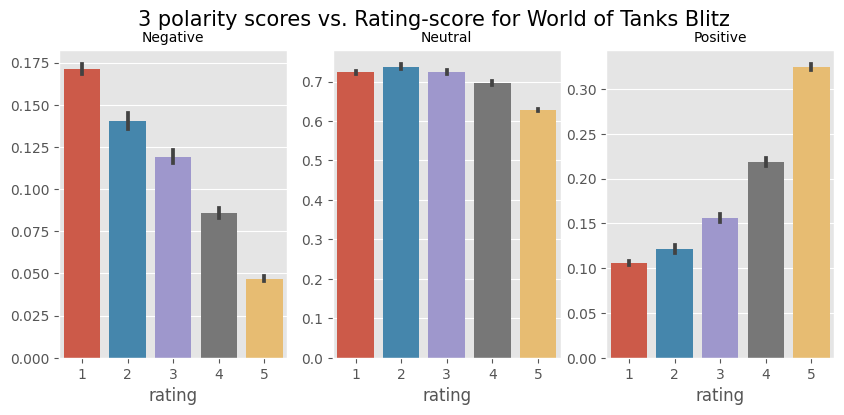

In [25]:
# Filter
df_merged_wot_blitz = df_merged[df_merged['app_name'] == 'World of Tanks Blitz']

# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize = (10,4))

sns.barplot(x='rating', y='neg', data=df_merged_wot_blitz, ax=ax0)
sns.barplot(x='rating', y='neu', data=df_merged_wot_blitz, ax=ax1)
sns.barplot(x='rating', y='pos', data=df_merged_wot_blitz, ax=ax2)

ax0.set_title('Negative', fontsize=10)
ax1.set_title('Neutral', fontsize=10)
ax2.set_title('Positive', fontsize=10)

ax0.set(ylabel=None)
ax1.set(ylabel=None)
ax2.set(ylabel=None)
plt.suptitle('3 polarity scores vs. Rating-score for World of Tanks Blitz', fontsize=15)
plt.show()

### Plotting compound polarity score vs Star-score

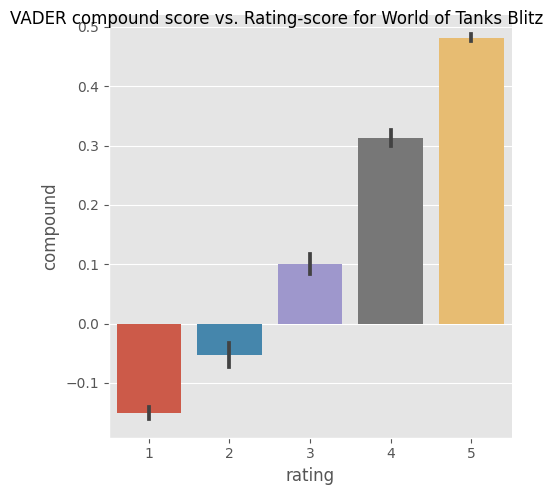

In [26]:
ax_compound = sns.catplot(x='rating', y='compound', data=df_merged_wot_blitz, kind='bar')
ax_compound.fig.suptitle('VADER compound score vs. Rating-score for World of Tanks Blitz')
plt.show()

### __Notes:__
- The two graphs above show the VADER sentiment results compared against the rating submitted by the users
- X-axis shows 5 different bins corresponding to 5 scale rating (stars). 
- Y-axis represents the VADER sentiment score, either compound or polarity score. 
- To begin the interpretation of the graph, let's look at the compound score first. The higher the compound score of the analyzed text, the higher the rating of the game. Negative compound score corresponds to 1-star and 2-star rating. Positive compound score begins with a 3-star rating and the higher the compound the more observations fall into the 4-star and 5-star rating.

## Step 4. VADER sentiment rating vs. User rating
__Let's compare VADER rating vs. User Rating ('rating' variable)__

We can begin by mapping the compound score to a 1 to 5-star scale.

In [27]:
# Define a function to map compound scores to a five-star scale
def map_to_five_stars(compound):
    # Map the compound score from the range (-1, 1) to the range (1, 5)
    return max(min(round((compound + 1) * 2.5), 5), 1)

# Apply the mapping function to create a new column with the converted ratings
df_merged_wot_blitz['five_star_rating'] = df_merged_wot_blitz['compound'].apply(map_to_five_stars)

C:\Users\macko\AppData\Local\Temp\ipykernel_32880\418063009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_wot_blitz['five_star_rating'] = df_merged_wot_blitz['compound'].apply(map_to_five_stars)


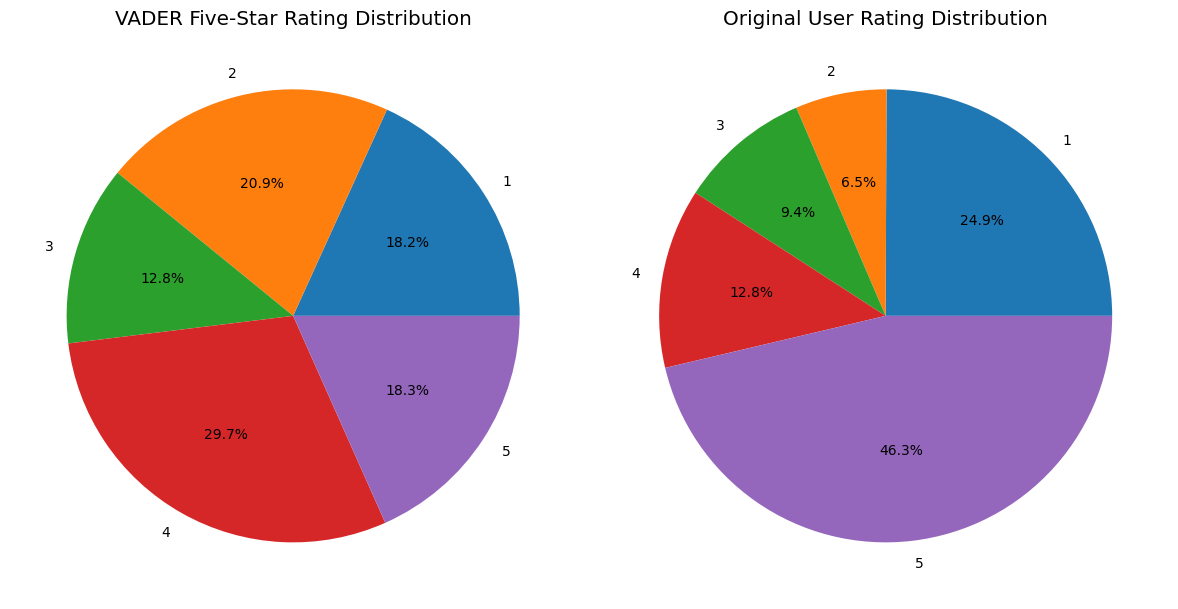

In [28]:
# Create a dictionary to map rating values to colors
rating_colors = {
    1: '#1f77b4',  # Blue
    2: '#ff7f0e',  # Orange
    3: '#2ca02c',  # Green
    4: '#d62728',  # Red
    5: '#9467bd',  # Purple
    # Add more colors if needed for other ratings
}

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for five_star_rating with consistent colors
five_star_counts = df_merged_wot_blitz['five_star_rating'].value_counts().sort_index()
colors_five_star = [rating_colors[i] for i in five_star_counts.index]
axs[0].pie(five_star_counts, labels=five_star_counts.index, autopct='%1.1f%%', colors=colors_five_star)
axs[0].set_title('VADER Five-Star Rating Distribution')

# Pie chart for original rating with consistent colors
rating_counts = df_merged_wot_blitz['rating'].value_counts().sort_index()
colors_original_rating = [rating_colors[i] for i in rating_counts.index]
axs[1].pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=colors_original_rating)
axs[1].set_title('Original User Rating Distribution')

plt.tight_layout()
plt.show()

#### Average VADER vs. User rating of World of Tanks Blitz

In [29]:
# Calculate the average rating for VADER rating
average_vader_rating = df_merged_wot_blitz['five_star_rating'].mean()
print(f"The average rating using VADER is: {average_vader_rating:.2f}")

# Calculate the average rating for user rating
average_user_rating = df_merged_wot_blitz['rating'].mean()
print(f"The average original user rating is: {average_user_rating:.2f}")

The average rating using VADER is: 3.09
The average original user rating is: 3.49


### __Notes:__
- As we can see in the comparison above, the text analyzed using VADER sentiment analysis shows more negative rating than the user rating.
- There are several possible explanations for this observation:
    - the reviews tend to be less positive than the submitted user rating, 
    - the bag of words approach used by the VADER model lacks contextual analysis. VADER analyzes each word separately.
        - there are different models capturing contextuality, i.e. Roberta from Huggingface